# 数据清理

## 收集

In [1]:
import pandas as pd
import numpy as np
import requests
import json

In [2]:
tweets = pd.read_csv('twitter-archive-enhanced.csv')
json = pd.read_json('tweet_json.json', lines=True)

In [3]:
#下载推特图像的预测数据
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', 'wb') as f:
    f.write(r.content)

In [4]:
predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
#将json表格写入excel文件方便目测评估
writer = pd.ExcelWriter('json.xlsx')
json.to_excel(writer, 'json', index = False)
writer.save()

## 评估

In [6]:
# 显示表格tweets
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


`tweets`是WeRateDogs的推特档案，包括2356条含评分的推特的基本信息。

In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

*tweet_id*是整型，而不是字符串。  
*timestamp*是字符串，而不是日期格式。    
从*retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp*的信息可看出有181条转发数据。  

In [8]:
tweets.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [9]:
tweets.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [10]:
tweets[tweets.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [11]:
tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

分子有很多超过20的值，分母有很多不是10

In [13]:
tweets.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Bailey         7
Buddy          7
Toby           7
Daisy          7
Dave           6
Scout          6
Bella          6
Oscar          6
Jack           6
Rusty          6
Koda           6
Leo            6
Milo           6
Jax            6
Stanley        6
Sunny          5
            ... 
Howie          1
Jiminus        1
Goliath        1
Nico           1
Naphaniel      1
Jockson        1
Rudy           1
Hero           1
Kollin         1
Jimbo          1
Milky          1
Mingus         1
Ralphé         1
Lillie         1
by             1
Crimson        1
Bonaparte      1
Edmund         1
Marvin         1
Dallas         1
Keet           1
Bobble         1
Randall        1
Darla          1
Mac            1
Bilbo          1
Mack           1
Lugan         

In [14]:
pd.set_option('max_colwidth', 140)
tweets[tweets.name== 'None'].text

5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWe...
7       When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nO...
12               Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
24                                 You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
25      This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https:...
30                                        @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
32                                                                                               RT @Athletics: 

In [15]:
tweets[tweets.name== 'None'].text.str.find('name').value_counts()

-1      731
 39       2
 26       2
 108      1
 63       1
 58       1
 46       1
 36       1
 33       1
 31       1
 20       1
 11       1
 4        1
Name: text, dtype: int64

In [16]:
tweets[tweets.name== 'an'].text.str.find('name').value_counts()

-1     6
 34    1
Name: text, dtype: int64

In [17]:
tweets[tweets.name== 'a'].text.str.find('name').value_counts()

-1     35
 30     4
 40     2
 33     2
 32     2
 48     1
 44     1
 42     1
 38     1
 37     1
 34     1
 31     1
 28     1
 27     1
 25     1
Name: text, dtype: int64

狗名有很多缺失值以及a和an这种无效值，这些缺失值和无效值对应的推文中有一部分可以提取出狗的名字。

In [18]:
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
# 显示表格json
json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'i...","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGK...",39492,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'i...","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DG...",33786,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/...",NaN,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'i...","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DG...",25445,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/w...,NaN,...,0.0,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'i...","{'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_...",42863,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,...,0.0,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 89132755194...","{'media': [{'id': 891327551943041024, 'id_str': '891327551943041024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DF...",41016,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWe...",NaN,...,0.0,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
5,NaN,NaN,2017-07-29 00:08:17,"

`json`是通过推特API获取的补充数据，包含此前遗漏的转发数（retweet count）和喜爱数（favorite count）。

In [20]:
json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null int64
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

*contributors、coordinates*和*geo*列为空。  
从*retweeted_status*可看出有177条转发数据。  
*id,id_str*是整型，而不是字符串。  
*created_at*是字符串，而不是日期格式。   

In [21]:
json[json.retweeted_status.notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
31,NaN,NaN,2017-07-15 02:45:48,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21, 26]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Athletics', 'name': 'A's, But Sp...",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,NaN,...,0.0,NaN,8.860534e+17,8.860534e+17,106,False,"{'created_at': 'Sat Jul 15 02:44:07 +0000 2017', 'id': 886053734421102592, 'id_str': '886053734421102592', 'full_text': '12/10 #BATP htt...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
35,NaN,NaN,2017-07-13 01:35:06,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'SpookyWeRateDogs™', 'id': 4196983835, 'id_str': ...","{'media': [{'id': 830583314243268608, 'id_str': '830583314243268608', 'indices': [110, 133], 'media_url': 'http://pbs.twimg.com/media/C4...",0,False,RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,NaN,...,0.0,NaN,NaN,NaN,19188,False,"{'created_at': 'Sun Feb 12 01:04:29 +0000 2017', 'id': 830583320585068544, 'id_str': '830583320585068544', 'full_text': 'This is Lilly. ...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
67,NaN,NaN,2017-06-26 00:13:58,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'SpookyWeRateDogs™', 'id': 4196983835, 'id_str': ...",NaN,0,False,RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https...,NaN,...,NaN,NaN,NaN,NaN,7118,False,"{'created_at': 'Fri Jun 23 01:10:23 +0000 2017', 'id': 878057613040115712, 'id_str': '878057613040115712', 'full_text': 'This is Emmy. S...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
72,NaN,NaN,2017-06-24 00:09:53,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'SpookyWeRateDogs™', 'id': 4196983835, 'id_str': ...",NaN,0,False,"RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nht...",NaN,...,NaN,NaN,NaN,NaN,1338,False,"{'created_at': 'Fri Jun 23 16:00:04 +0000 2017', 'id': 878281511006478336, 'id_str': '878281511006478336', 'full_text': 'Meet Shadow. In...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
73,NaN,NaN,2017-06-23 18:17:33,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'SpookyWeRateDogs™', 'id': 4196983835, 'id_str': ...",NaN,0,False,RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.c...,NaN,...,NaN,NaN,NaN,NaN,6925,False,"{'created_at': 'Tue Nov 24 03:51:38 +0000 2015', 'id': 669000397445533696, 'id_str': '669000397445533696', 'full_text': 'Meet Terrance. ...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRa

In [22]:
json[json.quoted_status.notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
34,NaN,NaN,2017-07-13 15:19:09,"[0, 47]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/gzLHboL7Sk', 'expanded_url': 'https://twitter.com/4b...",NaN,20739,False,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,...,0.0,"{'created_at': 'Thu Jul 13 15:12:47 +0000 2017', 'id': 885517367337512960, 'id_str': '885517367337512960', 'full_text': '@dog_rates my g...",8.855174e+17,8.855174e+17,3876,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
41,NaN,NaN,2017-07-10 03:08:17,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/uF3pQ8Wubj', 'expanded_url': 'https://twitter.com/ka...",NaN,74192,False,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,NaN,...,0.0,"{'created_at': 'Sun Jul 09 08:26:49 +0000 2017', 'id': 883965650754039809, 'id_str': '883965650754039809', 'full_text': 'Have you ever s...",8.839657e+17,8.839657e+17,21105,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
71,NaN,NaN,2017-06-24 13:24:20,"[0, 45]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/9uABQXgjwa', 'expanded_url': 'https://twitter.com/bb...",NaN,30835,False,Martha is stunning how h*ckin dare you. 13/10 https://t.co/9uABQXgjwa,NaN,...,0.0,"{'created_at': 'Sat Jun 24 13:05:06 +0000 2017', 'id': 878599868507402241, 'id_str': '878599868507402241', 'full_text': 'World's ugliest...",8.785999e+17,8.785999e+17,7510,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
82,NaN,NaN,2017-06-18 20:30:39,"[0, 117]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/8yoc1CNTsu', 'expanded_url': 'https://twitter.com/mp...",NaN,23789,False,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1...,NaN,...,0.0,"{'created_at': 'Sat Jun 17 19:41:50 +0000 2017', 'id': 876162994446753793, 'id_str': '876162994446753793', 'full_text': 'These are the a...",8.761630e+17,8.761630e+17,4775,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
87,NaN,NaN,2017-06-14 21:06:43,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/PFp4MghzBW', 'expanded_url': 'https://twitter.com/dr...",NaN,27915,False,You'll get your package when that precious man is done appreciating the pups. 13/10 for everyone https://t.co/PFp4MghzBW,NaN,...,0.0,"{'created_at': 'Mon Jun 12 23:49:34 +0000 2017', 'id': 874413398133547008, 'id_str': '874413398133547008', 'full_text': 'So this is why ...",8.744134e+17,8.744134e+17,6303,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
109,NaN,NaN,2017-06-03 20:33:19,"[0, 25]","{

In [23]:
json.favorited.value_counts()

False    2352
Name: favorited, dtype: int64

In [24]:
json.retweeted.value_counts()

False    2352
Name: retweeted, dtype: int64

In [25]:
json.truncated.value_counts()

False    2352
Name: truncated, dtype: int64

favorited、retweeted和truncated三列的值均为false

In [26]:
json.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2217
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [27]:
json[json.in_reply_to_status_id.notnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
29,NaN,NaN,2017-07-15 16:51:35,"[27, 105]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'NonWhiteHat', 'name': 'Patrick Nonwhite', 'id': 2281181600, 'id_str':...",NaN,117,False,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,...,NaN,NaN,NaN,NaN,4,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
54,NaN,NaN,2017-07-02 21:58:53,"[13, 91]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'roushfenway', 'name': 'Roush Fenway Racing', 'id': 47384430, 'id_str'...",NaN,129,False,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,...,NaN,NaN,NaN,NaN,7,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
63,NaN,NaN,2017-06-27 12:14:36,"[16, 31]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'RealKentMurphy', 'name': 'Kent', 'id': 3105440746, 'id_str': '3105440...",NaN,313,False,@RealKentMurphy 14/10 confirmed,NaN,...,NaN,NaN,NaN,NaN,10,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
112,NaN,NaN,2017-06-02 19:38:25,"[30, 60]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ComplicitOwl', 'name': 'Derek', 'id': 16487760, 'id_str': '16487760',...",NaN,120,False,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,...,NaN,NaN,NaN,NaN,3,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
146,NaN,NaN,2017-05-13 16:15:35,"[17, 134]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Jack_Septic_Eye', 'name': 'Jacksepticeye', 'id': 77596200, 'id_str': ...",NaN,2349,False,"@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,...,NaN,NaN,NaN,NaN,105,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
147,NaN,NaN,2017-05-12 17:12:53,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 863079538779013120, 'id_str': '863079538779013120', 'i...","{'media': [{'id': 863079538779013120, 'id_str': '863079538779013120', 'indices': [140, 163], 'media_url': 'http://pbs.twimg.com/media/C_...",9068,False,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14...",NaN,...,0.0,NaN,NaN,NaN,1188,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'SpookyWeRateDogs™', 'screen_name': 'dog_rates', 'location': 'MERCH↴ DM DOGS. WE WIL..."
176,NaN,NaN,2017-04-26 12:48:51,"[10, 28]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Marc_IRL', 'name': 'Marc Watson', 'id': 180670967, 'id_str': '1806709...",NaN

In [28]:
json.favorite_count.value_counts()

0        177
1753       3
3548       3
689        3
1526       3
520        3
465        3
171        3
3508       3
343        3
2417       3
3217       2
3846       2
1501       2
2452       2
262        2
195        2
242        2
2616       2
2250       2
3221       2
1085       2
1187       2
1722       2
248        2
1124       2
14506      2
2231       2
1861       2
5377       2
        ... 
4715       1
23100      1
2644       1
8769       1
1671       1
39492      1
1498       1
5773       1
10824      1
1046       1
21069      1
35406      1
4687       1
2381       1
31314      1
8575       1
17001      1
12887      1
2648       1
4697       1
4699       1
2652       1
6750       1
8799       1
2656       1
10852      1
5878       1
14950      1
6760       1
15858      1
Name: favorite_count, Length: 2023, dtype: int64

In [29]:
json.retweet_count.value_counts()

1280     5
312      5
745      5
1554     4
1103     4
1201     4
37       4
61       4
606      4
680      4
701      4
182      4
6925     4
8471     4
468      4
252      3
1873     3
2690     3
71       3
118      3
1036     3
516      3
617      3
2142     3
280      3
263      3
521      3
1084     3
698      3
985      3
        ..
2482     1
4533     1
4535     1
441      1
2490     1
445      1
4479     1
377      1
325      1
2422     1
329      1
333      1
8527     1
6480     1
10580    1
345      1
347      1
2400     1
4449     1
705      1
6500     1
357      1
6504     1
361      1
6506     1
367      1
4465     1
2418     1
2420     1
0        1
Name: retweet_count, Length: 1752, dtype: int64

In [30]:
#检查tweets表格里的tweet_id是否都存在于json表格里
len(tweets[~tweets.tweet_id.isin(json.id)])

4

In [31]:
#检查json表格里的id是否都存在于tweets表格里
len(json[~json.id.isin(tweets.tweet_id)])

0

`tweets`表格里有4条推特记录中的tweet_id在`json`表格里不存在。

In [32]:
# 显示表格 predictions
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [33]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


*tweet_id*是整型，而不是字符串。  
*created_at*是字符串，而不是日期格式。  

In [34]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [35]:
#检查tweets表格里的tweet_id是否都存在于predictions表格里
len(tweets[~tweets.tweet_id.isin(predictions.tweet_id)])

281

In [36]:
#检查predictions表格里的tweet_id是否都存在于tweets表格里
len(predictions[~predictions.tweet_id.isin(tweets.tweet_id)])

0

In [37]:
#检查predictions表格里的tweet_id是否都存在于json表格里
len(predictions[~predictions.tweet_id.isin(json.id)])

2

In [38]:
#检查json表格里的id是否都存在于predictions表格里
len(json[~json.id.isin(predictions.tweet_id)])

279

`tweets` 表格中有281条推特记录中的*tweet_id*在 `predictions` 表格中不存在。

#### 质量
##### `tweets` 表格

- *tweet_id*是整型，而不是字符串
- 有281条推特记录中的*tweet_id*在 `predictions` 表格中不存在，即有281条数据没有图片信息。
- 有4条推特记录中的*tweet_id*在 `json` 表格中不存在。
- 含有181条转发数据
- 分子有很多超过20的值
- 分母有很多不是10
- 狗狗姓名提取不完整、不准确
- *in_reply_to_status_id*、*in_reply_to_user_id*、*source*、*expanded_urls*列与分析内容不太相关


##### `json` 表格
- id_str是整型，而不是字符串
- 含有177条转发数据
- *contributors*、*coordinates*和*geo*列为空
- *favorited*、*retweeted*和*truncated*三列的值均为false

##### `predictions` 表格
- tweet_id是整型，而不是字符串


#### 清洁度
-  `tweets` 表格中的*doggo*、*floofer*、*pupper*和*puppo*四列应合并为一个变量
-  `tweets` 表格、`json` 表格和`predictions`表格 应合并为一个表格  
  
## 清理

In [39]:
tweets_clean = tweets.copy()
json_clean = json.copy()
predictions_clean = predictions.copy()




### 清洁度

#### `tweets` 表格中的*doggo*、*floofer*、*pupper*和*puppo*四列应合并为一个变量：狗狗地位stage

#### 定义  
- 将*doggo*、*floofer*、*pupper*和*puppo*四列的值合并放入stage列，将合并值替换为正常值后删除*doggo*、*floofer*、*pupper*和*puppo*这四列。

#### 代码

In [40]:
tweets_clean['stage'] = tweets_clean['doggo'] + tweets_clean['floofer'] + tweets_clean['pupper'] + tweets_clean['puppo']
tweets_clean['stage'].replace('NoneNoneNoneNone', np.NaN, inplace=True)
tweets_clean['stage'].replace('doggoNoneNoneNone','doggo', inplace=True)
tweets_clean['stage'].replace('NoneflooferNoneNone','floofer', inplace=True)
tweets_clean['stage'].replace('NoneNonepupperNone','pupper', inplace=True)
tweets_clean['stage'].replace('NoneNoneNonepuppo','puppo', inplace=True)
tweets_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

In [41]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         380 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


In [42]:
tweets_clean.stage.value_counts()

pupper                  245
doggo                    83
puppo                    29
doggoNonepupperNone      12
floofer                   9
doggoNoneNonepuppo        1
doggoflooferNoneNone      1
Name: stage, dtype: int64

In [43]:
pd.set_option('max_colwidth', 200)
tweets_clean[tweets_clean.stage == 'doggoNoneNonepuppo'].text

191    Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
Name: text, dtype: object

In [44]:
#手动修改狗狗地位
tweets_clean['stage'].replace('doggoNoneNonepuppo','puppo', inplace=True)

In [45]:
pd.set_option('max_colwidth', 200)
tweets_clean[tweets_clean.stage == 'doggoflooferNoneNone'].text

200    At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
Name: text, dtype: object

In [46]:
#手动修改狗狗地位
tweets_clean['stage'].replace('doggoflooferNoneNone','floofer', inplace=True)

In [47]:
pd.set_option('max_colwidth', 200)
tweets_clean[tweets_clean.stage == 'doggoNonepupperNone'].text

460     This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
531                         Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
565                                                                                                    Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
575                         This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
705     This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
733                                                                                                               Pupper butt 1, Doggo 

通过推特原文可知，同时具备两个地位的情况有一下几种：
- 该评分包含2只狗
- 该评分没涉及任何一种狗狗的地位
- 狗狗地位只有1个，但错误地提取了2个  

同时具备两个地位的数据占比例很小，但情况又比较多样，不值得花时间逐个手动清理，统一标记为空值。

In [48]:
tweets_clean['stage'].replace('doggoNonepupperNone',np.nan, inplace=True)

In [49]:
tweets_clean.stage.value_counts()

pupper     245
doggo       83
puppo       30
floofer     10
Name: stage, dtype: int64

In [50]:
#将狗狗地位转为为分类数据
tweets_clean.stage = tweets_clean.stage.astype('category')

#### 测试

In [51]:
pd.set_option('max_colwidth', 200)
tweets_clean[tweets_clean.stage.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\r\n\r\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Koda. He is a South A

In [52]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         368 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 241.8+ KB


In [53]:
tweets_clean.stage.value_counts()

pupper     245
doggo       83
puppo       30
floofer     10
Name: stage, dtype: int64

### 质量

#### `tweets` 表格包含181条转发数据

#### 定义  
- 删除181条转发数据，即只保留*retweeted_status_id*为空值的行

#### 代码

In [54]:
tweets_clean = tweets_clean[tweets_clean.retweeted_status_id.isnull()]

#### 测试

In [55]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
stage                         334 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 240.2+ KB


#### `tweets` 表格*in_reply_to_status_id*、*in_reply_to_user_id*、*source*、*expanded_urls*列以及与retweeted相关的列无用

#### 定义  
- 删除*in_reply_to_status_id*、*in_reply_to_user_id*、*source*、*expanded_urls*列和retweeted相关的列

#### 代码

In [56]:
tweets_clean = tweets_clean[['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'stage']]

#### 测试

In [57]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 334 non-null category
dtypes: category(1), int64(3), object(3)
memory usage: 121.3+ KB


#### `tweets` 表格狗狗评分的分子和分母不准确

#### 定义  
- 用正则表达式重新提取狗狗评分的分子和分母

#### 代码

In [58]:
#查看分母是10的倍数的推特原文
tweets_clean[tweets_clean['rating_denominator'].isin([20,40,50,70,80,90,110,120,130,150,170])].text

433                                                        The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
902                                                                             Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1120                                 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165                                                                                          Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202                                     This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1228                                                             Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1254                                          

In [59]:
#查看分母不是10的倍数的推特原文
tweets_clean[tweets_clean['rating_denominator'].isin([2,7,11,15,16])].text

342                                                                                                                                          @docmisterio account started on 11/15/15
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \r\nKeep Sam smiling by clicking and sharing this link:\r\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
1068                                     After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1662                                      This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
1663                                      I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
2335                                         This is an Albanian 3 1/2 legged  Episcopalia

分母是10的n倍代表对n只狗进行评分，分母不是10的倍数则说明数据提取错误

In [60]:
#tweets_clean['rating_numerator']=tweets_clean['rating_numerator']
#tweets_clean['rating_denominator']=tweets_clean['rating_denominator']
#tweets_clean.info()

In [61]:
#有些分子为小数，将分子转为浮点数
tweets_clean.rating_numerator = tweets_clean.rating_numerator.astype(float)
#tweets_clean.rating_denominator = tweets_clean.rating_denominator.astype(float)
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 334 non-null category
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 121.3+ KB


In [62]:
#含有句号
tweets_clean.rating_numerator = tweets_clean.text.str.extract('([1-9]*\.?[1-9]+)(?:/[1-9]+0)', expand=False).values
tweets_clean.rating_denominator = tweets_clean.text.str.extract('(?:[1-9]*\.?[1-9]+/)([1-9]+0)', expand=False).values
tweets_clean.rating_numerator.value_counts()

12       498
11       423
13       307
9        153
8         98
7         57
14        44
5         35
6         33
4         20
3         19
2          9
1          7
.11        4
.9         3
.12        2
.13        1
182        1
84         1
165        1
11.26      1
11.27      1
1776       1
666        1
144        1
44         1
13.5       1
9.5        1
121        1
9.75       1
15         1
88         1
99         1
143        1
45         1
17         1
.8         1
Name: rating_numerator, dtype: int64

In [63]:
tweets_clean.rating_numerator = tweets_clean.text.str.extract('(([1-9]+\.)?([1-9]+))(?:/[1-9]+0)', expand=False).values
tweets_clean.rating_denominator = tweets_clean.text.str.extract('(?:[1-9]*\.?[1-9]+/)([1-9]+0)', expand=False).values

#### 测试

In [64]:
tweets_clean.rating_numerator.value_counts()

12       500
11       427
13       308
9        156
8         99
7         57
14        44
5         35
6         33
4         20
3         19
2          9
1          7
165        1
182        1
144        1
11.26      1
11.27      1
1776       1
666        1
84         1
44         1
9.5        1
121        1
9.75       1
15         1
13.5       1
99         1
143        1
45         1
17         1
88         1
Name: rating_numerator, dtype: int64

In [65]:
tweets_clean.rating_denominator.value_counts()

10     1721
20        2
130       1
90        1
150       1
50        1
170       1
40        1
120       1
80        1
70        1
110       1
Name: rating_denominator, dtype: int64

In [66]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      1733 non-null object
rating_denominator    1733 non-null object
name                  2175 non-null object
stage                 334 non-null category
dtypes: category(1), int64(1), object(5)
memory usage: 121.3+ KB


In [67]:
#查看分子值较为异常的推特原文
tweets_clean.rating_numerator = tweets_clean.rating_numerator.astype(float)
tweets_clean[tweets_clean['rating_numerator'].isin([1,2,3,4,5,6,11.26,666,1776])].text

189                                  @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
229     This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
730                                             Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC
765                           This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M
883                           This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP
912                           Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat ru

1776/10这个评分并没有提取错误，不过为了以后分析方便，把这个评分删除。

In [68]:
tweets_clean['rating_numerator'][979] = np.nan
tweets_clean['rating_denominator'][979] = np.nan

C:\Users\MaleBird\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\MaleBird\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### `tweets` 表格狗狗姓名提取不完整、不准确

#### 定义  
- 用正则表达式重新提取狗狗姓名

#### 代码

In [69]:
tweets_clean.name = tweets_clean.text.str.extract('(?:This is|Meet|name is|Say hello to|named) ([A-Z][a-z]{2,15})', expand=False)

#### 测试

In [70]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      1732 non-null float64
rating_denominator    1732 non-null object
name                  1399 non-null object
stage                 334 non-null category
dtypes: category(1), float64(1), int64(1), object(4)
memory usage: 201.3+ KB


In [71]:
tweets_clean['name'].value_counts()

Lucy         11
Charlie      11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Winston       8
Sadie         8
Lola          8
Daisy         7
Toby          7
Stanley       6
Jax           6
Bella         6
Koda          6
Bailey        6
Oscar         6
Rusty         5
Chester       5
Leo           5
Louis         5
Zoey          5
Bentley       5
Buddy         5
Scout         5
Milo          5
Sammy         4
Phil          4
Gus           4
Chip          4
             ..
Sailer        1
Liam          1
Bobbay        1
Birf          1
Mack          1
Mac           1
Lillie        1
Darla         1
Opie          1
Gordon        1
Alphred       1
Ridley        1
Swagger       1
Snickers      1
Chloe         1
Petrick       1
Jimbo         1
Milky         1
Kip           1
Cal           1
Grizzie       1
Crimson       1
Bonaparte     1
Edmund        1
Kollin        1
Marvin        1
Keet          1
Clyde         1
Randall       1
Rover         1
Name: name, Length: 941,


#### `json` 表格包含177条转发数据

#### 定义  
- 删除177条转发数据，即只保留*retweeted_status*为空值的行

#### 代码

In [72]:
json_clean = json.copy()

In [73]:
json_clean = json_clean[json_clean.retweeted_status.isnull()]

#### 测试

In [74]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2175 non-null datetime64[ns]
display_text_range               2175 non-null object
entities                         2175 non-null object
extended_entities                1994 non-null object
favorite_count                   2175 non-null int64
favorited                        2175 non-null bool
full_text                        2175 non-null object
geo                              0 non-null float64
id                               2175 non-null int64
id_str                           2175 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n



#### `json` 表格包含大量无用数据

#### 定义  
- 只保留*id*, *favorite_count*, *retweeted_status*列的数据

#### 代码

In [75]:
json_clean = json_clean[['id', 'favorite_count', 'retweet_count']]

#### 测试

In [76]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2351
Data columns (total 3 columns):
id                2175 non-null int64
favorite_count    2175 non-null int64
retweet_count     2175 non-null int64
dtypes: int64(3)
memory usage: 68.0 KB


### 清洁度

#### `tweets_clean` 表格、`json_clean` 表格和`predictions_clean` 表格应合并为一个表格

### 质量

#### `tweets` 表格中有281条推特记录中的*tweet_id*在 `predictions` 表格中不存在。

#### 定义  
- 将 `tweets_clean` 和`predictions_clean` 表格通过*tweets_id*以inner join的方式合并为`twitter_archive_master`表格，再与`json_clean`表格通过*tweet_id*和*id*以inner join的方式合并。合并后删除*id*列。

#### 代码

In [77]:
#tweets表格中有281条推特记录中的tweet_id在 predictions`表格中不存在。
#先合并tweets_clean和predictions_clean
df_temp = pd.merge(tweets_clean, predictions_clean, on=['tweet_id'], how='inner')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 18 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1577 non-null float64
rating_denominator    1577 non-null object
name                  1356 non-null object
stage                 297 non-null category
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
dtypes: bool(3), category(1), float64(4), int64(2), object(8)
memory usage: 241.6+ KB


In [78]:
twitter_archive_master = pd.merge(df_temp, json_clean, left_on='tweet_id',right_on='id', how='inner')

In [79]:
twitter_archive_master.drop(['id'],axis=1, inplace=True)

#### 测试

In [80]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 20 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1577 non-null float64
rating_denominator    1577 non-null object
name                  1356 non-null object
stage                 297 non-null category
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
dtypes: bool(3), category(1), float64(

### 质量

#### *tweet_id*是整型，而不是字符串

#### 定义  
- 将 *tweet_id*转为字符串类型

#### 代码

In [81]:
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype('str')

#### 测试

In [82]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 20 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1577 non-null float64
rating_denominator    1577 non-null object
name                  1356 non-null object
stage                 297 non-null category
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
dtypes: bool(3), category(1), float64

#### *timestamp*是字符串，而不是日期格式。

#### 定义  
- 将 *timestamp*转为日期格式。

#### 代码

In [83]:
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])

#### 测试

In [84]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 20 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1577 non-null float64
rating_denominator    1577 non-null object
name                  1356 non-null object
stage                 297 non-null category
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
dtypes: bool(3), category(1),

## 保存

In [85]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## 分析和可视化

In [86]:
viz = pd.read_csv('twitter_archive_master.csv')

#### 1.评分

In [87]:
#新建一列标准评分
viz['std_rating'] = viz['rating_numerator']*10/viz['rating_denominator']

In [88]:
viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1577 non-null float64
rating_denominator    1577 non-null float64
name                  1356 non-null object
stage                 297 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
std_rating            1577 non-null flo

In [89]:
viz.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,std_rating
count,1.994000e+03,1577.000000,1577.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000,1577.000000
mean,7.358508e+17,11.213557,10.583386,1.203109,0.593941,1.344195e-01,6.024848e-02,8923.133400,2770.021063,10.681050
std,6.747816e+16,8.027832,7.912244,0.560777,0.271954,1.006807e-01,5.089067e-02,12400.238808,4715.961325,2.443188
min,6.660209e+17,1.000000,10.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,15.000000,0.235294
25%,6.758475e+17,9.000000,10.000000,1.000000,0.362857,5.393988e-02,1.619283e-02,1972.250000,622.250000,9.000000
50%,7.084748e+17,11.000000,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,4117.000000,1348.500000,11.000000
75%,7.877873e+17,12.000000,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,11275.500000,3202.750000,12.000000
max,8.924206e+17,165.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,132318.000000,79116.000000,14.000000


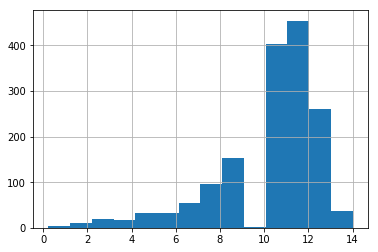

In [96]:
#标准评分直方图
viz.std_rating.hist(bins=14)

1577个有效评分的均值为10.68，大部分评分都在满分10分以上，最多次数的评分为12分，其次为11分。

#### 2.喜爱数和转发数

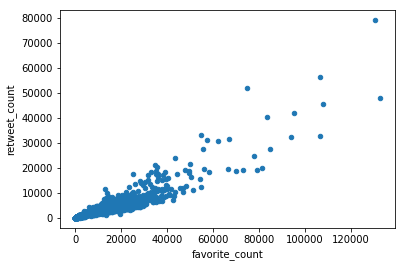

In [91]:
#喜爱数和转发数的关系图
viz.plot(x='favorite_count', y='retweet_count', kind='scatter')

In [92]:
viz[['favorite_count', 'retweet_count']].corr()

,favorite_count,retweet_count
favorite_count,1.000000,0.915022
retweet_count,0.915022,1.000000


平均喜爱数为8923，平均转发数为2770，两者呈线性相关。

#### 3.狗狗地位对喜爱数和转发数的影响

In [93]:
viz.groupby('stage')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
doggo,63.0,19284.174603,22125.538490,2581.0,8240.00,12323.0,20444.0,130533.0
floofer,8.0,13652.250000,10480.557016,2255.0,5529.25,11830.5,18573.0,33209.0
pupper,203.0,7176.157635,10687.768107,687.0,2413.00,3217.0,7641.0,106481.0
puppo,23.0,22643.652174,27831.569684,3265.0,7040.50,15329.0,21898.0,132318.0


In [94]:
viz.groupby('stage')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
doggo,63.0,7088.396825,12806.187498,718.0,2015.5,3300.0,5388.5,79116.0
floofer,8.0,4745.500000,5682.301797,494.0,2156.0,3334.5,4107.5,18343.0
pupper,203.0,2352.285714,3558.409135,102.0,686.0,1189.0,2447.0,32705.0
puppo,23.0,6986.260870,10345.255558,707.0,1714.0,3202.0,7487.5,47958.0


puppo平均收到22644次喜爱，是平均收到最多次喜爱的狗狗地位。  
dogggo平均被7088次转发，是平均被转发次数最多的狗狗地位，puppo平均被转发次数紧随其后，为6986次。

#### 4.神经网络对狗狗种类的预测

In [95]:
viz.groupby('p1_dog').p1_conf.mean()

p1_dog
False    0.535596
True     0.614364
Name: p1_conf, dtype: float64

只分析神经网络对狗狗种类预测可信度最高的数据，发现判断为狗的平均预测可信度为0.6144，判断为非狗的平均预测可信度为0.5356，两者差距并不算大。

#### 参考资料：
提取狗名：http://discussions.youdaxue.com/t/topic/54878/7